Training YOLO-V8 on a custom dataset

In [ ]:
!nvidia-smi

Sat Feb  4 09:02:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Installing YOLOv8



In [ ]:

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Importing the prepared custom dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jZ3Y4AFLQbRGmpzY77Ry")
project = rf.workspace("navtegh-singh-gill-mczmc").project("final-xlfid")
dataset = project.version(3).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c6f608e8b5dd1a424d775cb2702759da248d2c3c4e843a83dc74815ad2d5c15e
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to final-3 in yolov8:: 100%|██████████| 11040/11040 [00:03<00:00, 3042.91it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/final-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    train_batch12081.jpg
confusion_matrix.png				    train_batch12082.jpg
events.out.tfevents.1675502074.76649b9f6855.5137.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch12080.jpg				    weights


/content


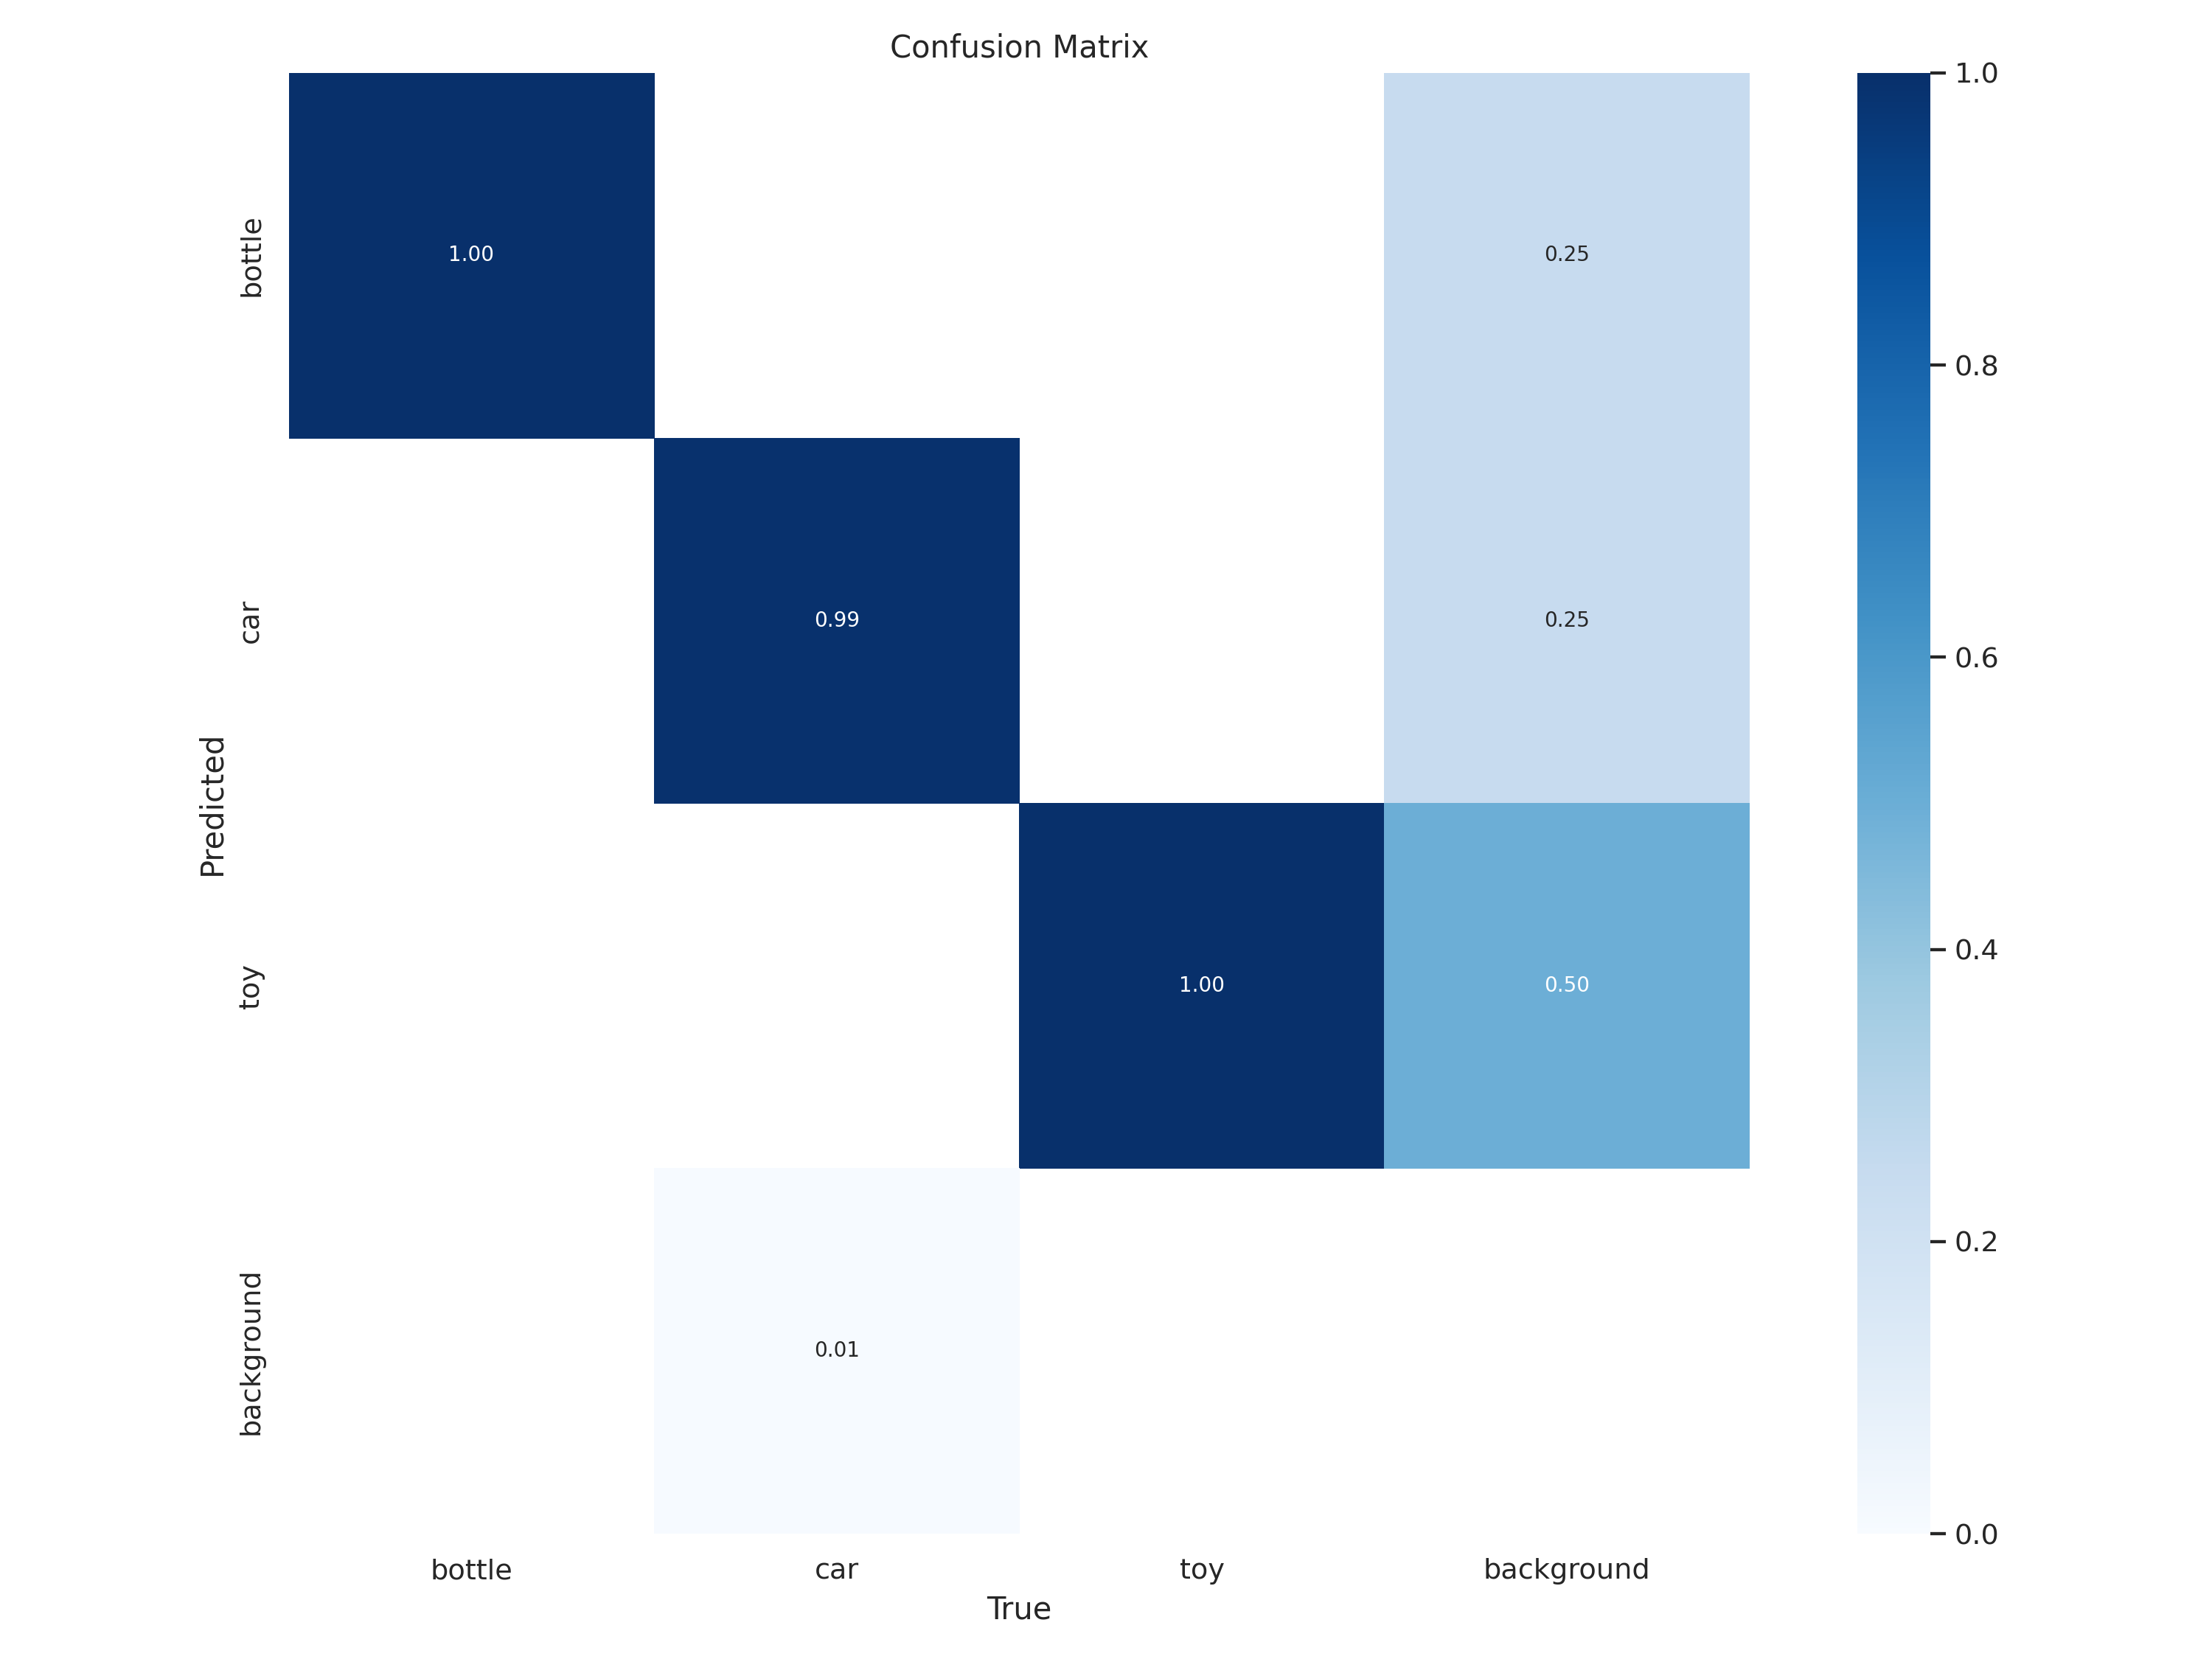

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


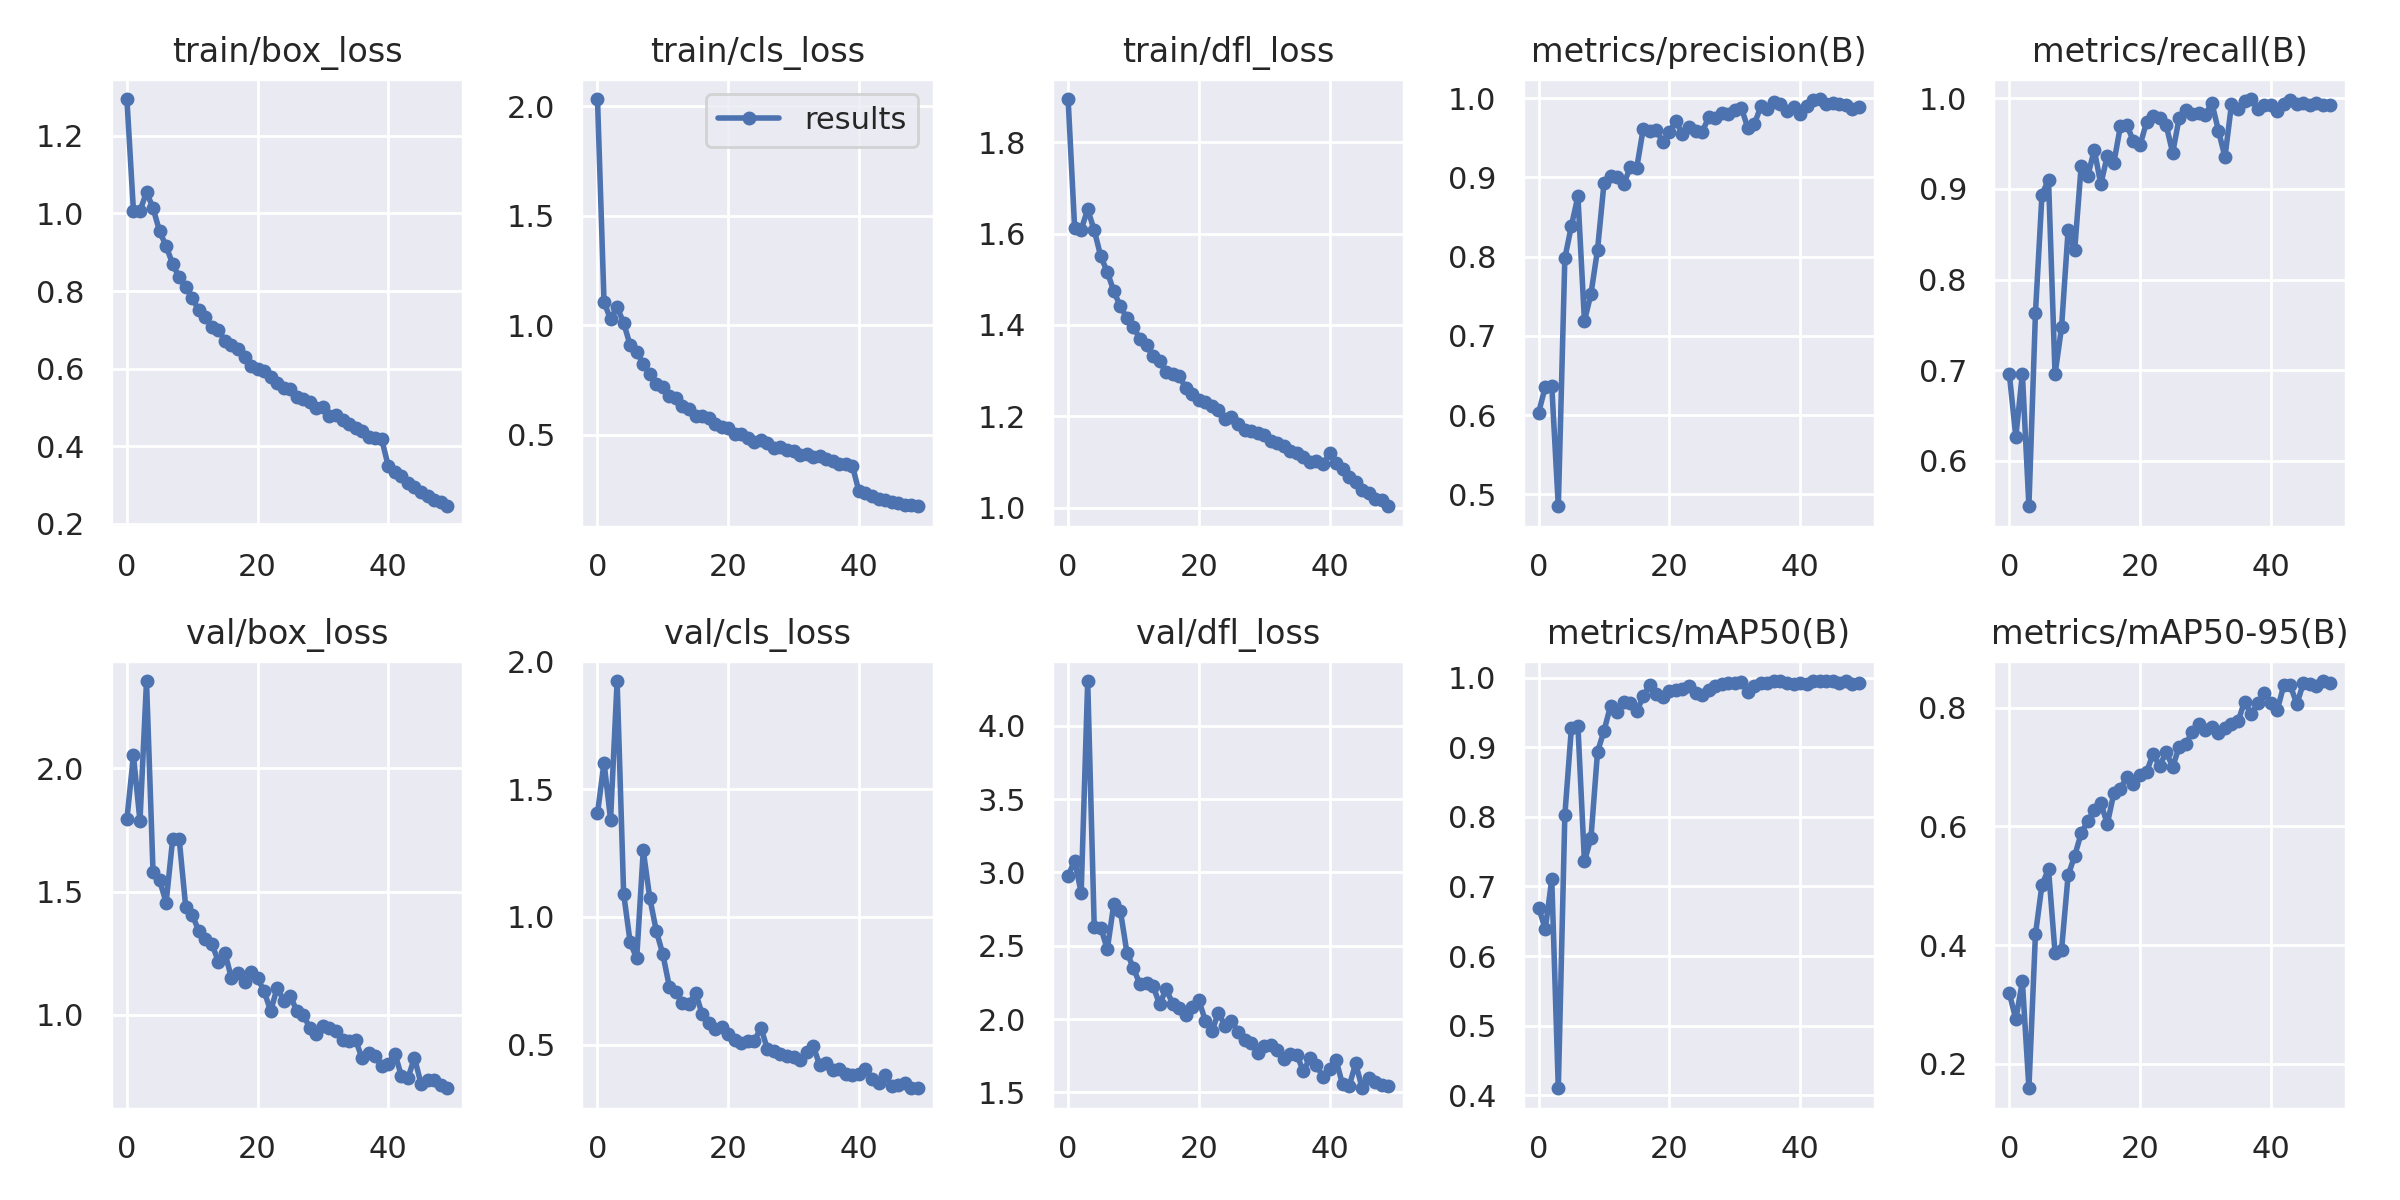

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


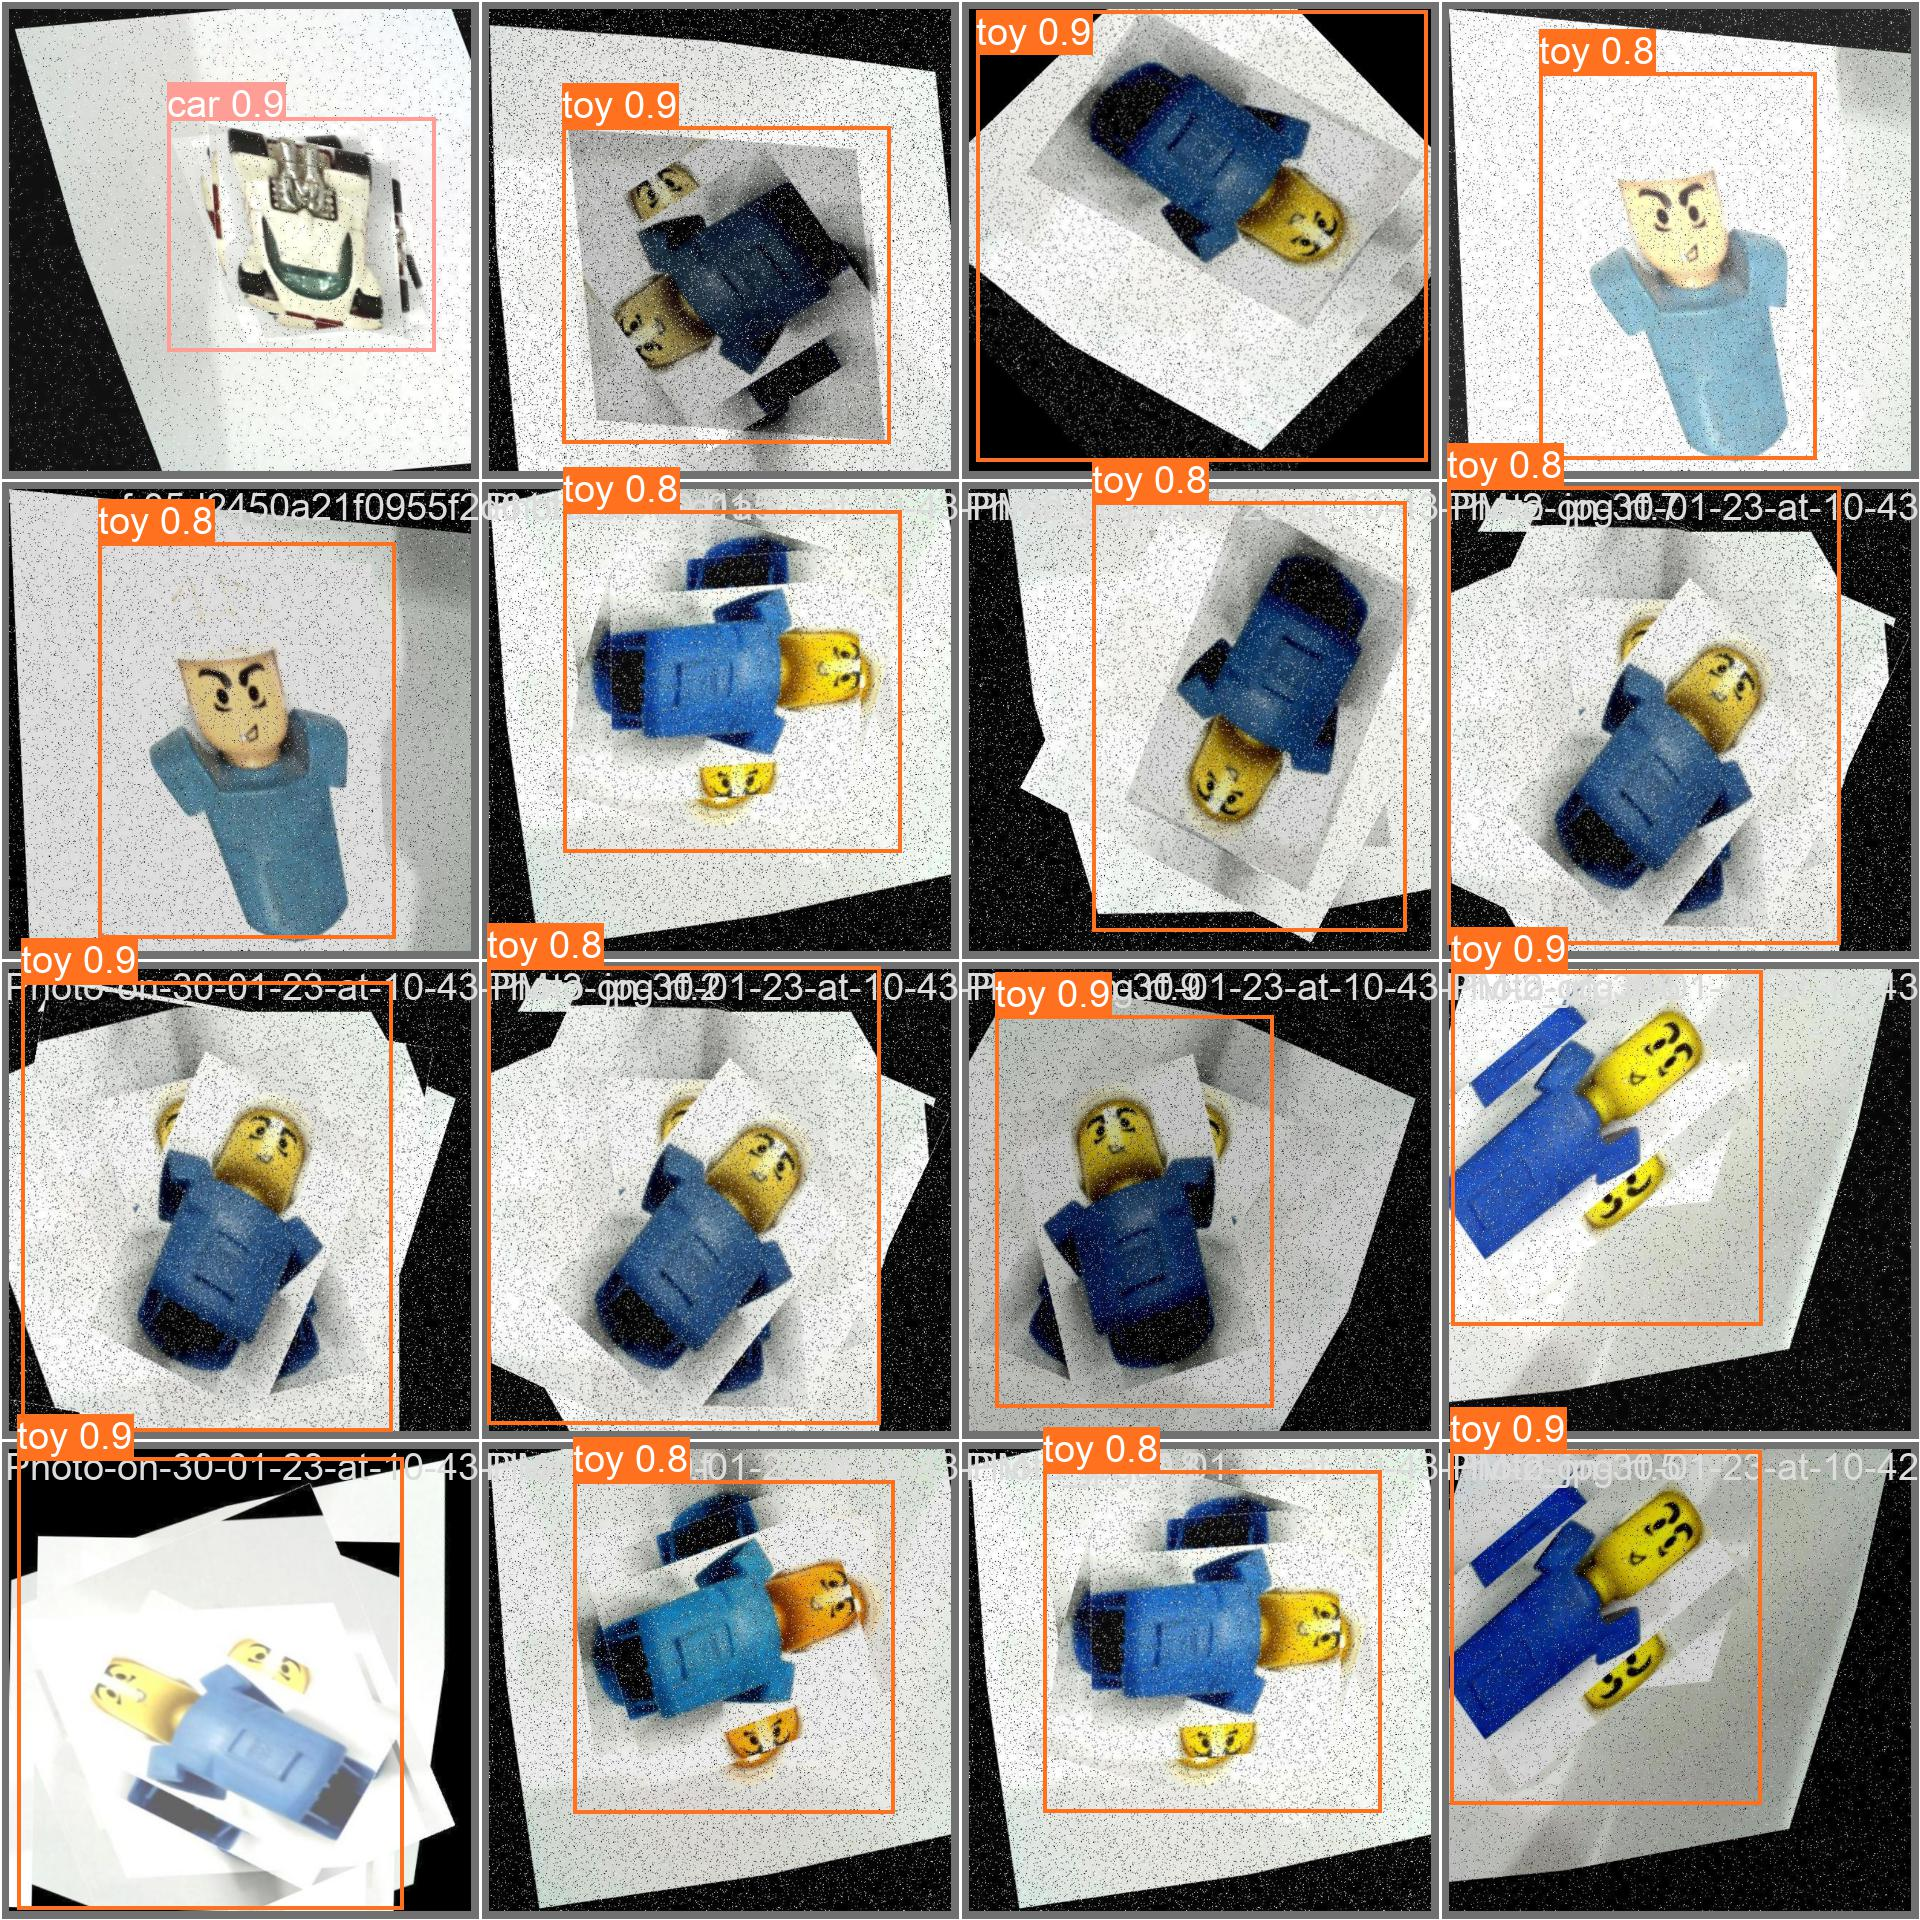

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/final-3/valid/labels.cache... 460 images, 0 backgrounds, 0 corrupt: 100% 460/460 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 196, len(boxes) = 460. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 29/29 [00:13<00:00,  2.09it/s]
                   all        460        460      0.987      0.992      0.991      0.844
                bottle        460        183      0.994          1      0.995       0.85
                   car        460        135      0.971      0.977      0.984      0.839
                   toy      

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/230 /content/final-3/test/images/1_jpg.rf.10ccac61b7a89c7a864004bb9fe7e5a9.jpg: 800x800 1 car, 26.2ms
image 2/230 /content/final-3/test/images/1_jpg.rf.15065bbca58f96995fcba8a40e748696.jpg: 800x800 1 car, 26.2ms
image 3/230 /content/final-3/test/images/1_jpg.rf.c147d730d9908a4dcbe7d2dd2e95130f.jpg: 800x800 1 car, 26.2ms
image 4/230 /content/final-3/test/images/2_jpg.rf.88b68d409247d334db03330282e7b652.jpg: 800x800 1 car, 26.2ms
image 5/230 /content/final-3/test/images/3_jpg.rf.3d1e30a89ebdb5e5fa1fbd1d03d9771d.jpg: 800x800 1 car, 26.2ms
image 6/230 /content/final-3/test/images/3_jpg.rf.e91f06db6e7536dbffe320157d9d2f78.jpg: 800x800 1 car, 23.2ms
image 7/230 /content/final-3/test/images/Photo-on-04-02-23-at-1-00-AM-2_jpg.rf.3f801722c6b47775c41bce6b42f8bb0b.jpg: 800x800 1 car, 23.2ms
image 8/230 /content/fin

**NOTE:** Let's take a look at few results.

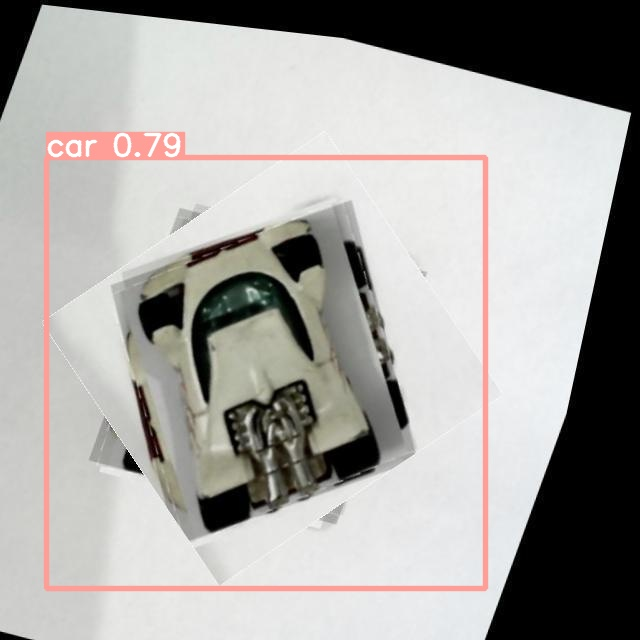

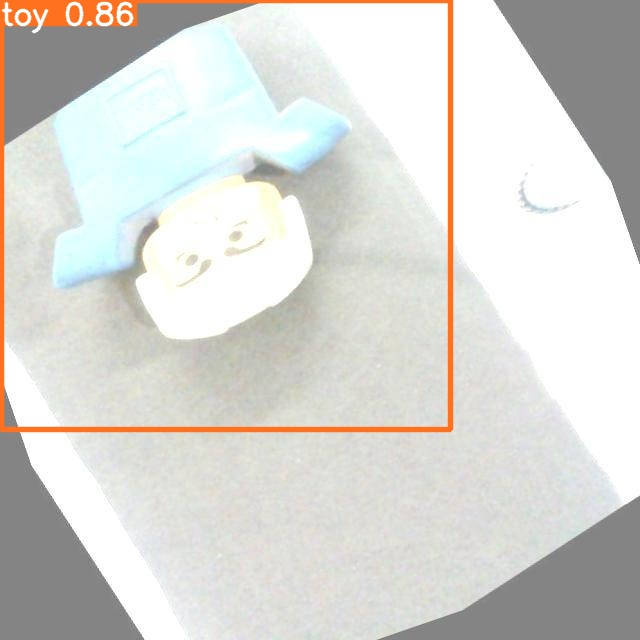

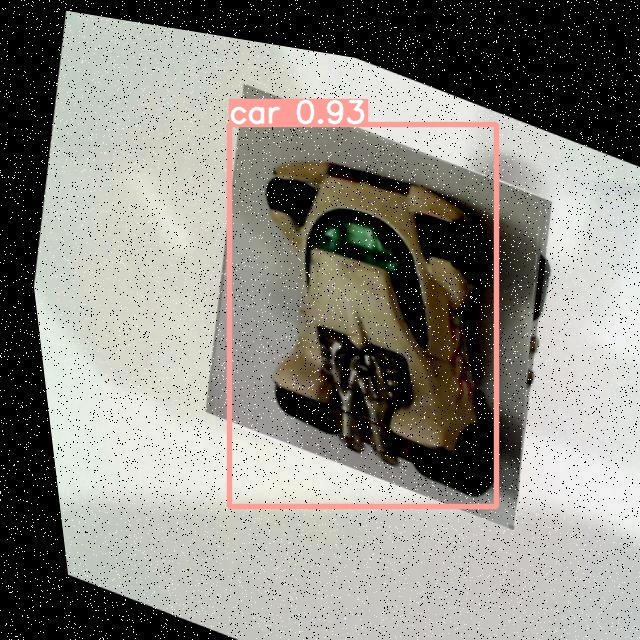

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/dog.jpeg (deflated 6%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/args.yaml (deflated 51%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/R_curve.png (deflated 12%)
  adding: content/runs/detect/val/F1_curve.png (deflated 12%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 33%)
  adding: content/runs/detect/val/P_curve.png (deflated 23%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 6

In [ ]:
from google.colab import files


In [ ]:
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download best.pt as the final trained model